## Testing HD plot

**Get Sv like normal**

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
azfp_xml_path = 'D:\\Documents\\Projects\\echopype\\echopype\\data\\17041823.XML'
azfp_01a_path = 'D:\\Documents\\Projects\\echopype\\echopype\\data\\17082117.01A'

In [3]:
from echopype.convert import Convert
tmp_convert = Convert(azfp_01a_path, azfp_xml_path)
tmp_convert.raw2nc()

File: 17082117.01A - Loading Profile #11925 21-Aug-2017 17:05:37 with xml=12022310.XML Bins2Avg=1 Time2Avg=40 Salinity=29.60 Pressure=60.0



In [4]:
from echopype.model import Model
tmp_echo = Model(tmp_convert)
tmp_echo.calibrate()

16:31:52 saving calibrated Sv to D:\Documents\Projects\echopype\echopype\data\17082117_Sv.nc


**Plot like normal**

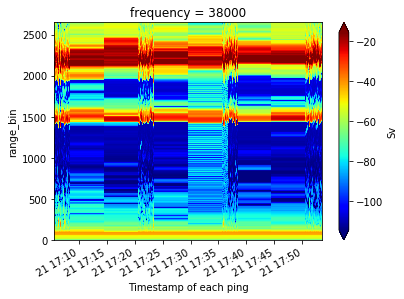

In [11]:
import matplotlib.pyplot as plt
tmp_echo.Sv.name = "Sv"
tmp_echo.Sv.isel(frequency=0).plot(x='ping_time', y='range_bin', cmap='jet', robust=True)
plt.show()

**Add range**

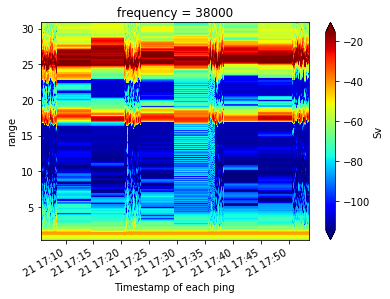

In [6]:
depth = tmp_echo.calc_range().isel(frequency=0)
da = tmp_echo.Sv.isel(frequency=0).assign_coords(range=depth)
da = da.swap_dims({'range_bin': 'range'})
da.plot(x='ping_time', y='range', cmap='jet', robust=True)
plt.show()

**Make ping bin**

In [7]:
import numpy as np
import xarray as xr
ping_bin = xr.DataArray(np.arange(tmp_echo.Sv.ping_time.size), coords=[("ping_time", tmp_echo.Sv.ping_time)])

**Swap ping bin and ping time**

In [8]:
new_da = da.assign_coords(ping_bin=ping_bin)
new_da = new_da.swap_dims({'ping_time': 'ping_bin'})

**Reinsert ping time**

In [12]:
index = lambda m, n: [i*n//m + n//(2*m) for i in range(m)]
ping_index = index(10, new_da.ping_time.size)
pings=[str(new_da.ping_time.values[i].astype('datetime64[m]')).split('T')[1] for i in ping_index]

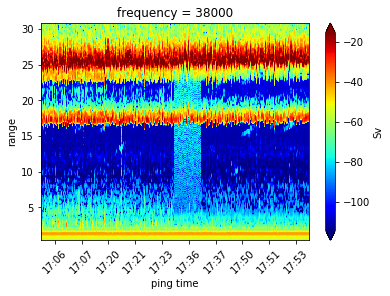

In [15]:
new_da.plot(x='ping_bin', y='range', cmap='jet', robust=True)
locs, labels = plt.xticks()
plt.xticks(ping_index, pings)
plt.xlabel("ping time")
plt.xticks(rotation=45)
plt.show()